# Default of Credit Card

# Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('default of credit card clients.xls', header= 1 )

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df['SEX'] = df['SEX'].astype('category')

In [6]:
df['EDUCATION'] = df['EDUCATION'].astype('category')

In [7]:
df['MARRIAGE'] = df['MARRIAGE'].astype('category')

In [8]:
df['SEX'] = df['SEX'].replace({1:'M',2:'F'})

In [9]:
df['EDUCATION'] = df['EDUCATION'].replace({1 : 'GrSc', 2 : 'Uni', 3 : 'HSc', 4 : 'Oth'})

In [10]:
df['MARRIAGE'] = df['MARRIAGE'].replace({1 : 'Mar', 2 : 'Sin', 3 : 'Oth'})

# Checking for Missing Values

In [11]:
df.isnull().sum()/ len(df)

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
dtype: float64

In [12]:
unique_values = df.apply(lambda col:col.unique())
column_names = list(df.columns)
for column_name in column_names:
  print(column_name + ':', unique_values[column_name])


ID: [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL: [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
SEX: ['F', 'M']
Categories (2, object): ['M', 'F']
EDUCATION: ['Uni', 'GrSc', 'HSc', 5, 'Oth', 6, 0]
Categories (7, object): [0, 'GrSc', 'Uni', 'HSc', 'Oth', 5, 6]
MARRIAGE: ['Mar', 'Sin', 'Oth', 0]
Categories (4, object): [0, 'Mar', 'Sin', 'Oth']
AGE: [24 26 34 37 57 29 23 28 35 51 4

In [13]:
df['EDUCATION'] = df['EDUCATION'].replace({0 : 'Oth', 5 :'Oth', 6: 'Oth'})

In [14]:
df['MARRIAGE'] = df['MARRIAGE'].replace({0 : 'Oth'})

In [15]:
unique_values = df.apply(lambda col:col.unique())
column_names = list(df.columns)
for column_name in column_names:
  print(column_name + ':', unique_values[column_name])


ID: [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL: [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
SEX: ['F', 'M']
Categories (2, object): ['M', 'F']
EDUCATION: ['Uni', 'GrSc', 'HSc', 'Oth']
Categories (4, object): ['GrSc', 'Uni', 'HSc', 'Oth']
MARRIAGE: ['Mar', 'Sin', 'Oth']
Categories (3, object): ['Mar', 'Sin', 'Oth']
AGE: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 3

# EDA

In [16]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [17]:
percentage_default_payment_next_month = df['default payment next month'].value_counts(normalize=True) * 100
percentage_default_payment_next_month

0    77.88
1    22.12
Name: default payment next month, dtype: float64

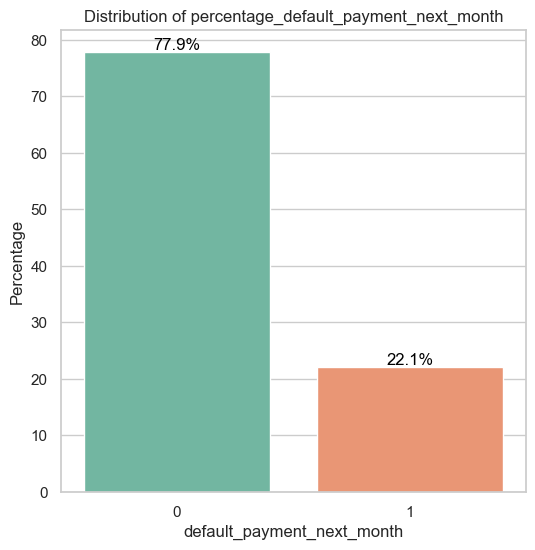

In [18]:
plt.figure(figsize=(6,6))

sns.set(style="whitegrid")
ax = sns.barplot(x=percentage_default_payment_next_month.index, y=percentage_default_payment_next_month.values, 
                 palette = 'Set2')

plt.xlabel('default_payment_next_month')
plt.ylabel('Percentage')
plt.title('Distribution of percentage_default_payment_next_month')

plt.xticks(range(len(percentage_default_payment_next_month.index)), ['0', '1'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', 
                va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

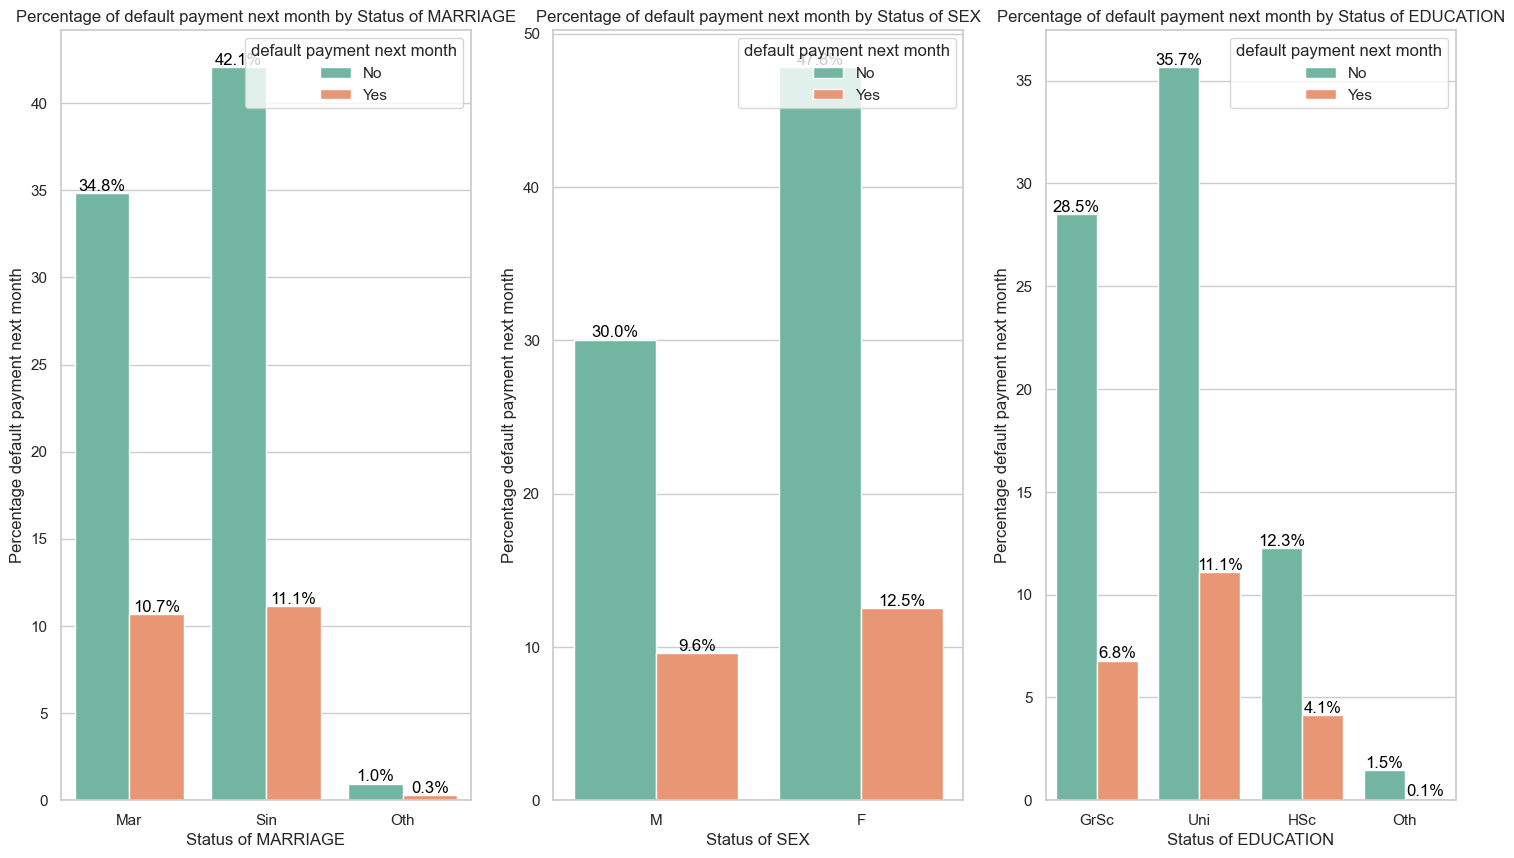

In [19]:
categorical_variables = ["MARRIAGE", "SEX", "EDUCATION"]

fig, axes = plt.subplots(1, len(categorical_variables), figsize=(18, 10))

for i, cat_var in enumerate(categorical_variables):
    ax = axes[i]
    X = cat_var
    Y = "default payment next month"
    Hue = "default payment next month"

    sns.set(style="whitegrid")
    ax = sns.barplot(data=df, x=X, y=Y, hue=Hue, ci=None, 
                     estimator=lambda x: len(x) / len(df) * 100, palette="Set2", ax=ax)

    ax.set_xlabel(f'Status of {X}')
    ax.set_ylabel(f'Percentage {Y}')
    ax.set_title(f'Percentage of {Y} by Status of {X}')

    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    ax.legend(handles, [f'No', f'Yes'], title=f"{Y}")

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', 
                    va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')




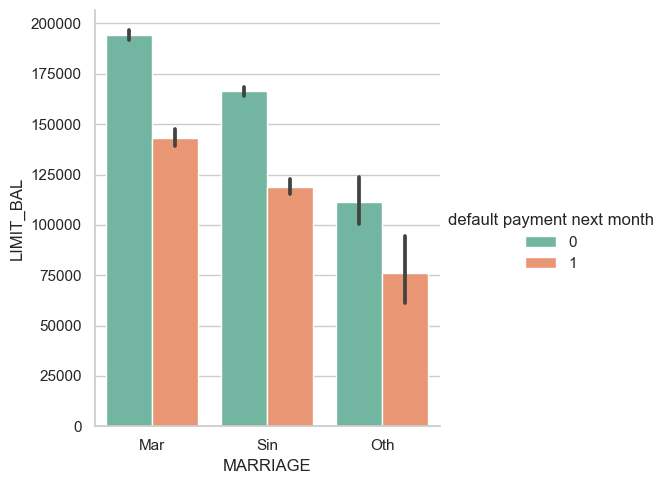

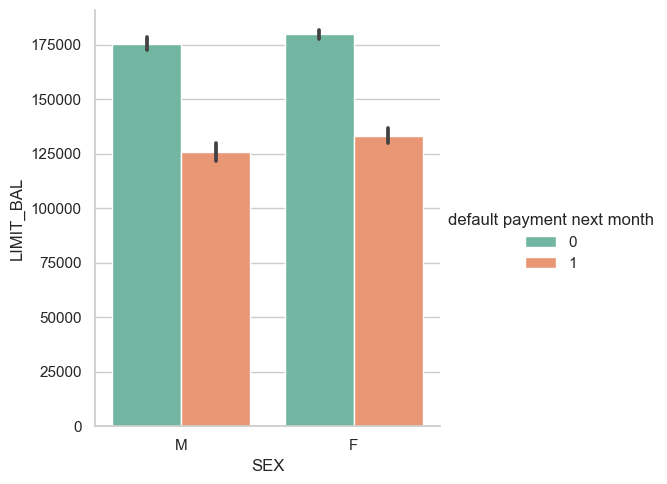

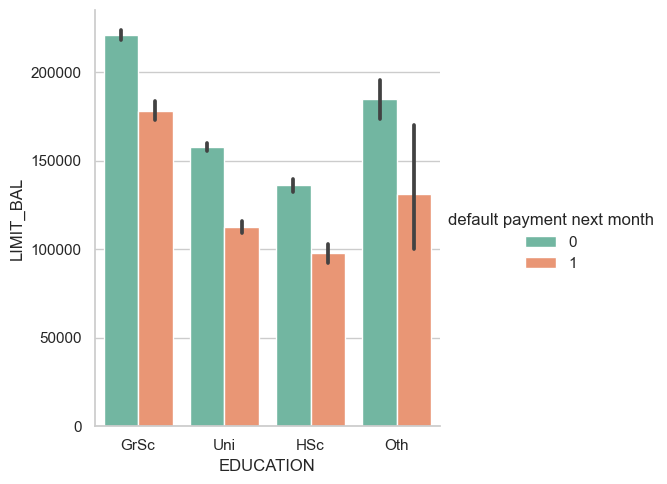

In [20]:
categorical_variables = ["MARRIAGE", "SEX", "EDUCATION"]

for i, cat_var in enumerate(categorical_variables):
    ax = axes[i]
    X = cat_var
    Y = "LIMIT_BAL"
    Hue = 'default payment next month'

    sns.set(style="whitegrid")
    sns.catplot(x=X, y=Y, data=df, kind="bar", palette="Set2",hue=Hue, ax=ax)

    ax.set_xlabel(f'{X}')
    ax.set_ylabel(f'{Y}')
    ax.set_title(f'{Y} by {Hue}')
    
    ax.legend(title='default payment next month', bbox_to_anchor=(1.05, 1), loc='upper left')
    
  
plt.show()

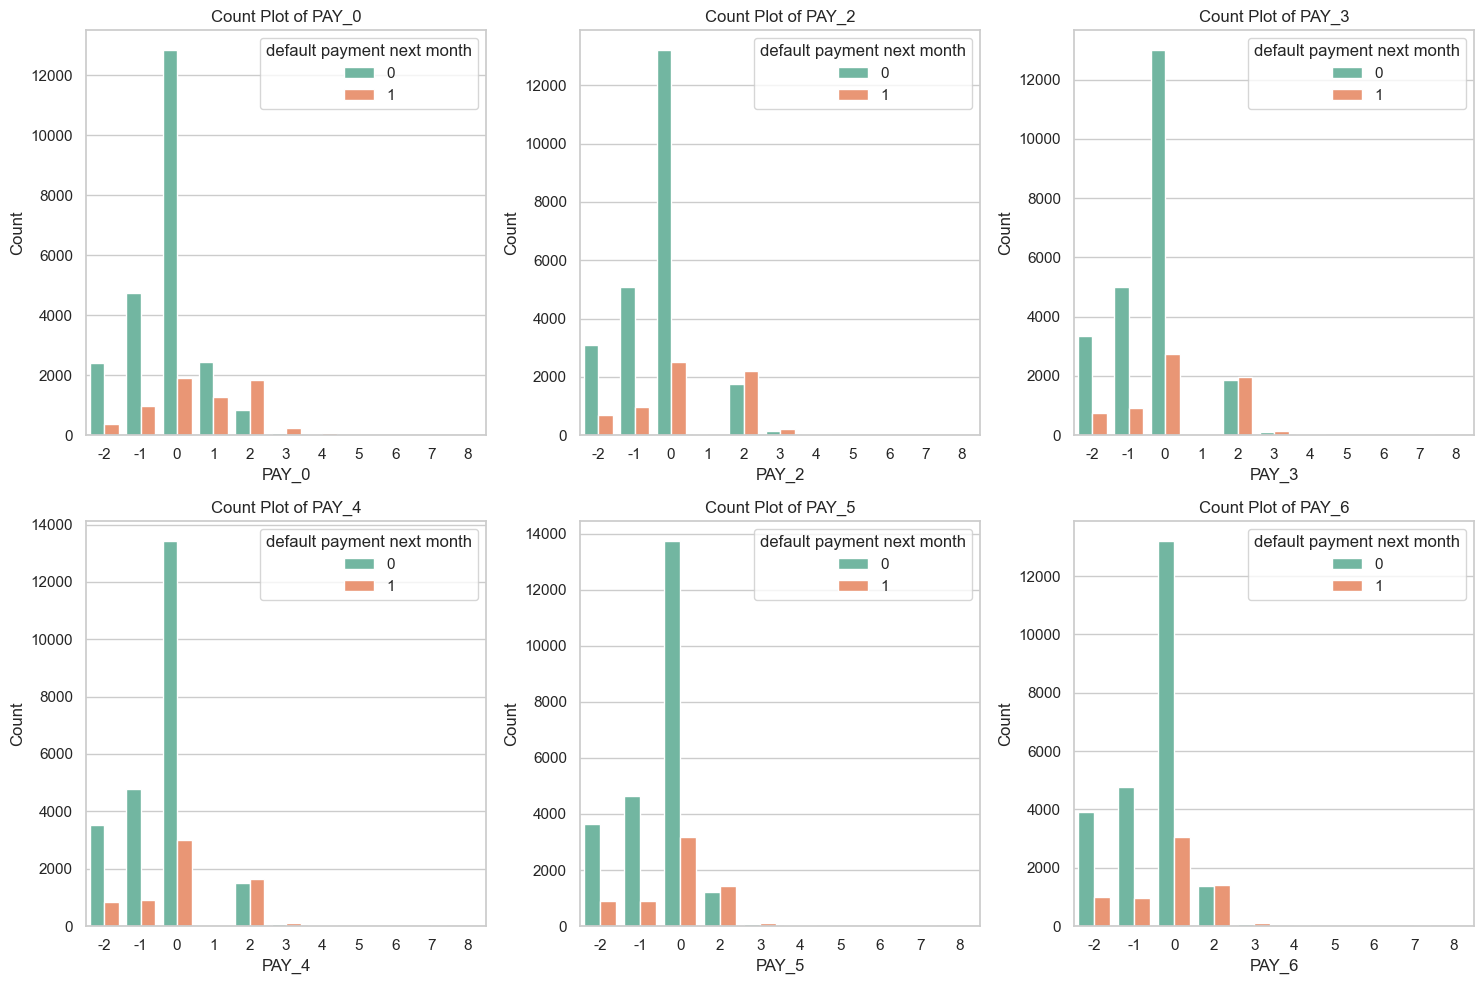

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()


for i, var in enumerate(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']):
    sns.countplot(data=df, x=var, hue='default payment next month', palette='Set2', ax=axes[i])
    axes[i].set_title(f'Count Plot of {var}')
    axes[i].set_xlabel(f'{var}')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='default payment next month')


plt.tight_layout()


plt.show()

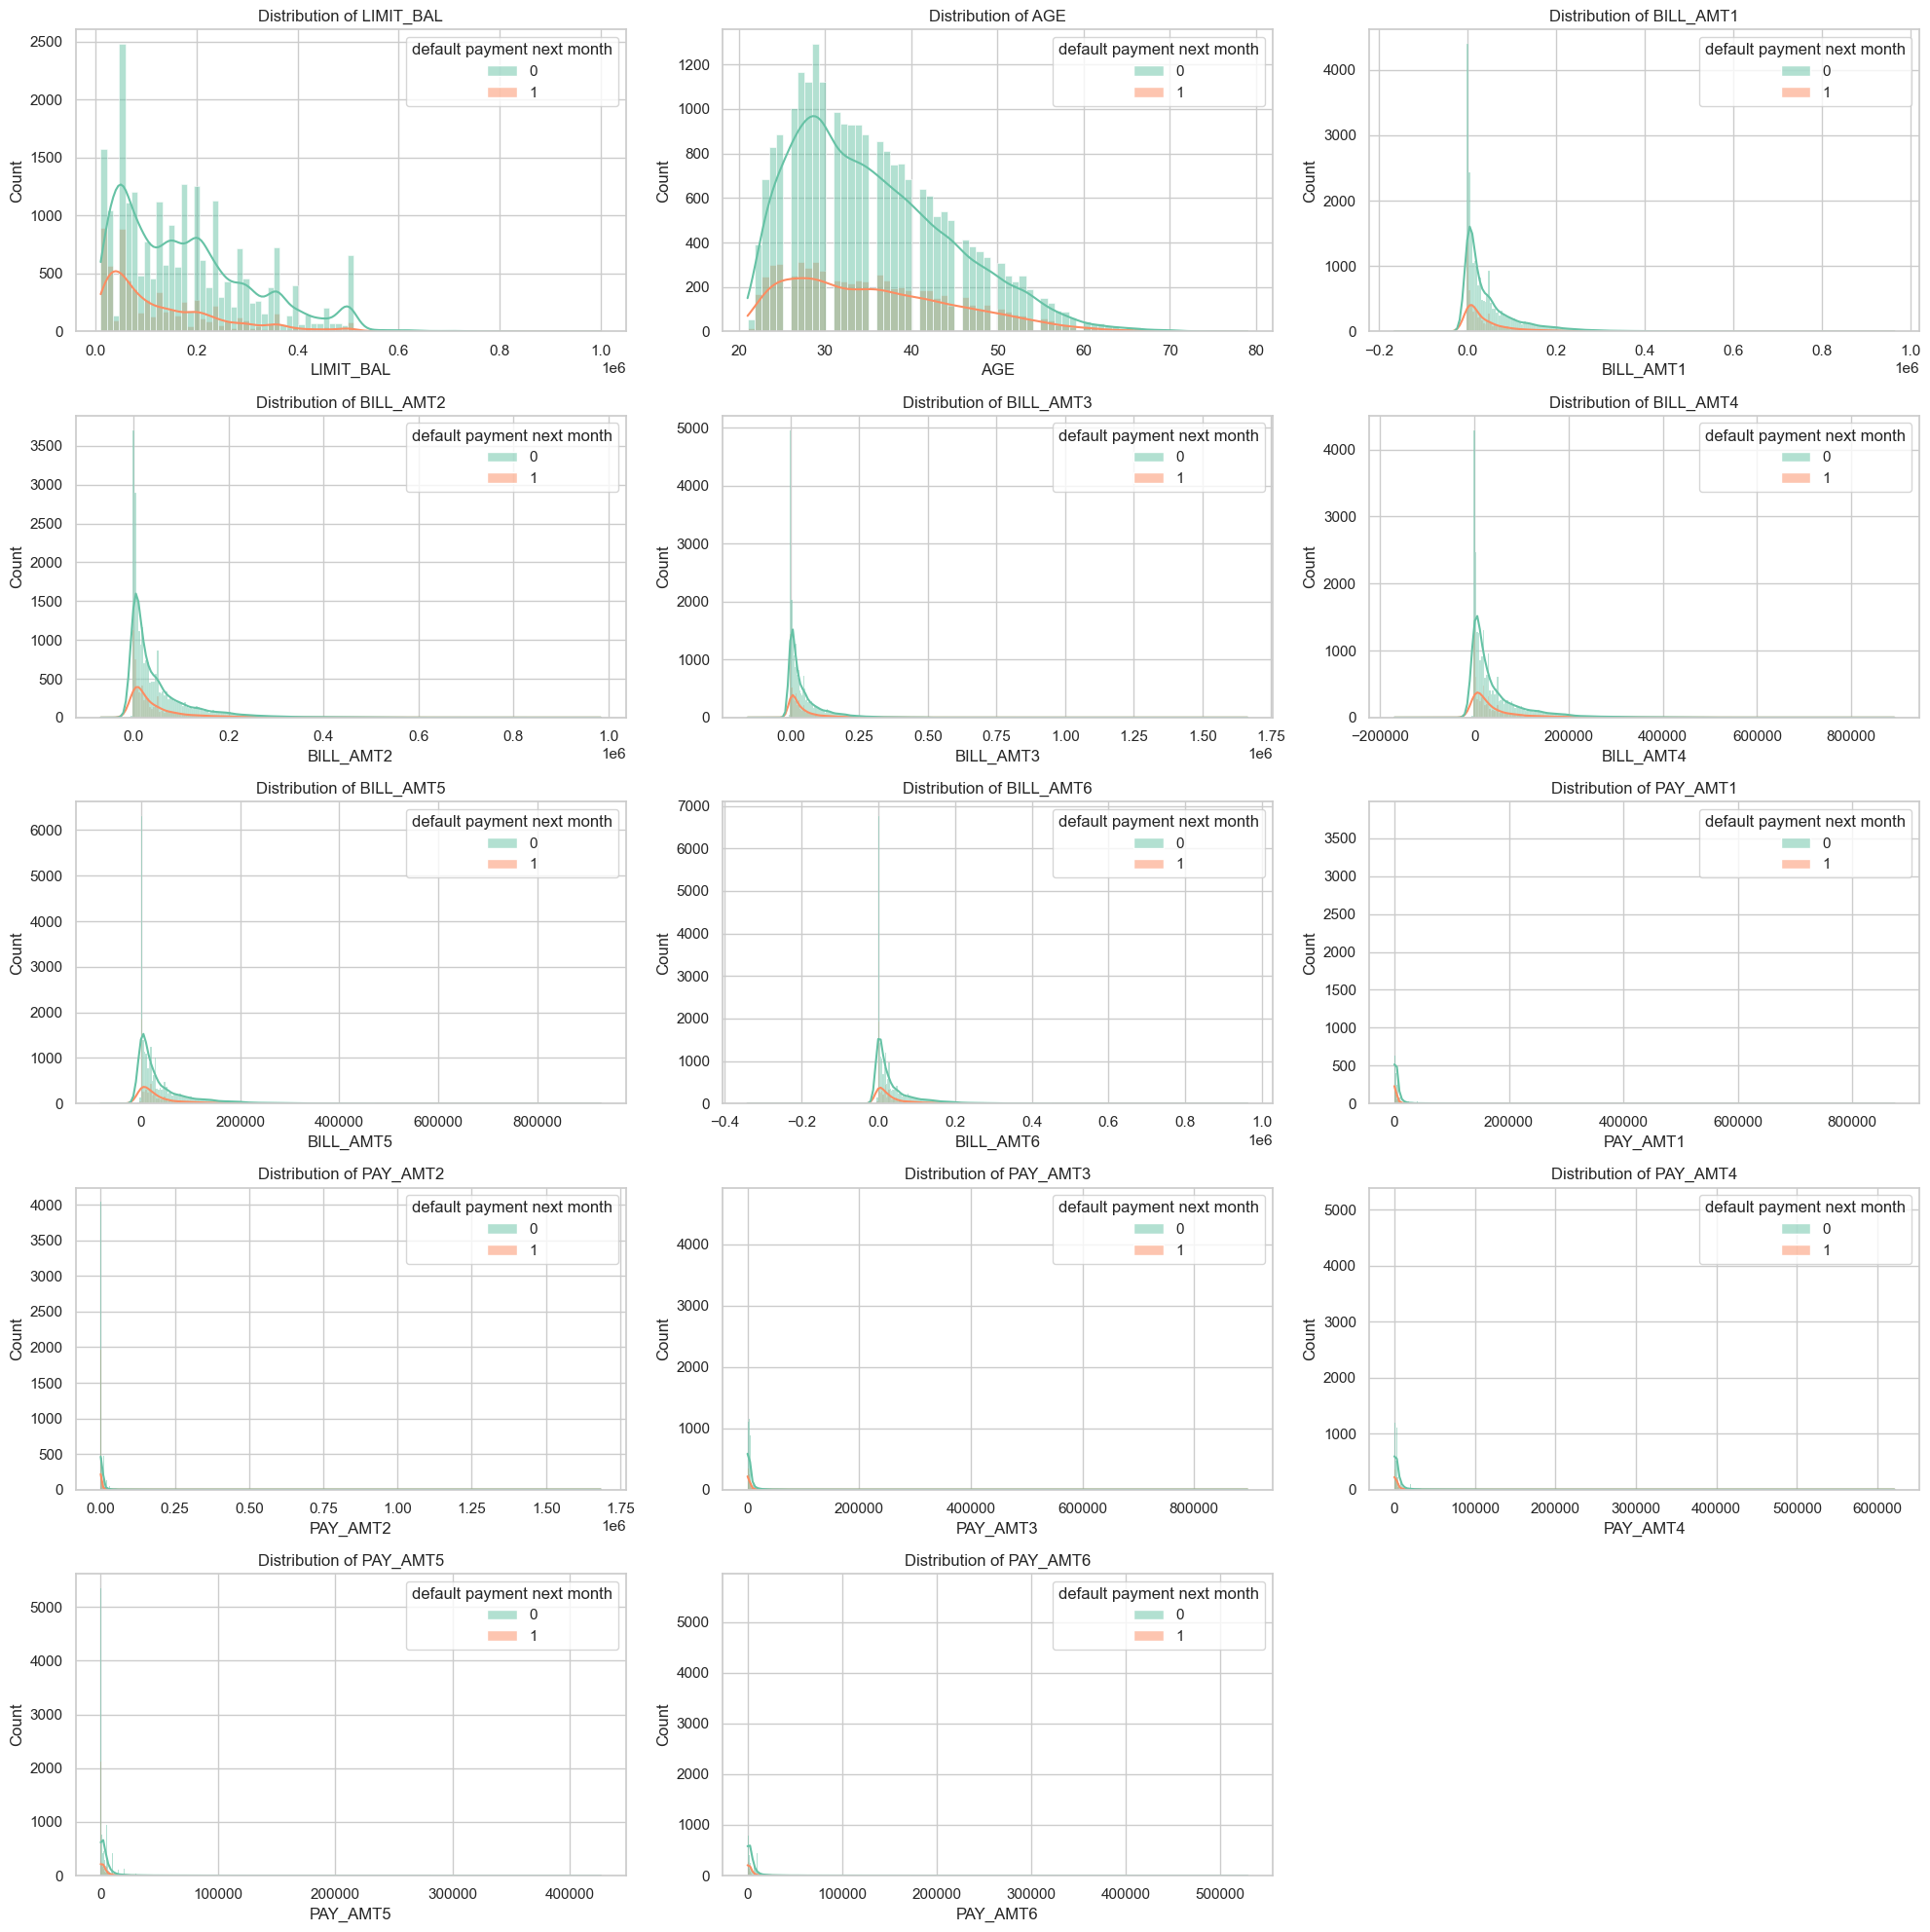

In [22]:
continuous_variables = ['LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
n_cols = 3
n_rows = (len(continuous_variables) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,20))

axes = axes.flatten()

for i, variable in enumerate(continuous_variables):
    ax = axes[i]
    sns.histplot(data=df, x=variable, kde=True, ax=ax, hue = 'default payment next month', palette = 'Set2')
    ax.set_title(f'Distribution of {variable}')
    ax.set_xlabel(variable)
    
for i in range(len(continuous_variables), n_rows * n_cols):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

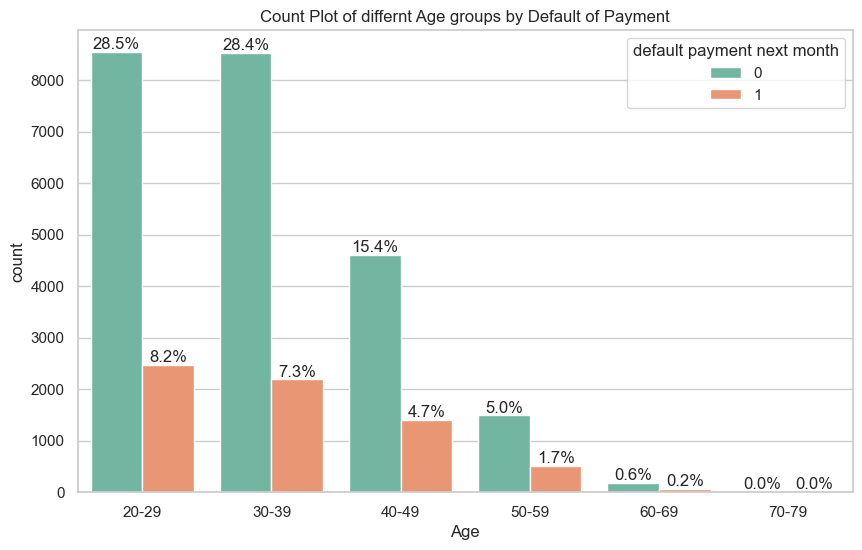

In [23]:
age_bins = [20, 30, 40, 50, 60, 70, 80]

df['age_group'] = pd.cut(df['AGE'], bins=age_bins, labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])

plt.figure(figsize=(10, 6))

sns.set(style="whitegrid")
ax = sns.countplot(df['age_group'], hue=df['default payment next month'], palette="Set2")

plt.xlabel('Age')
plt.title('Count Plot of differnt Age groups by Default of Payment')
plt.legend(title='default payment next month' )

total_count = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total_count:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()

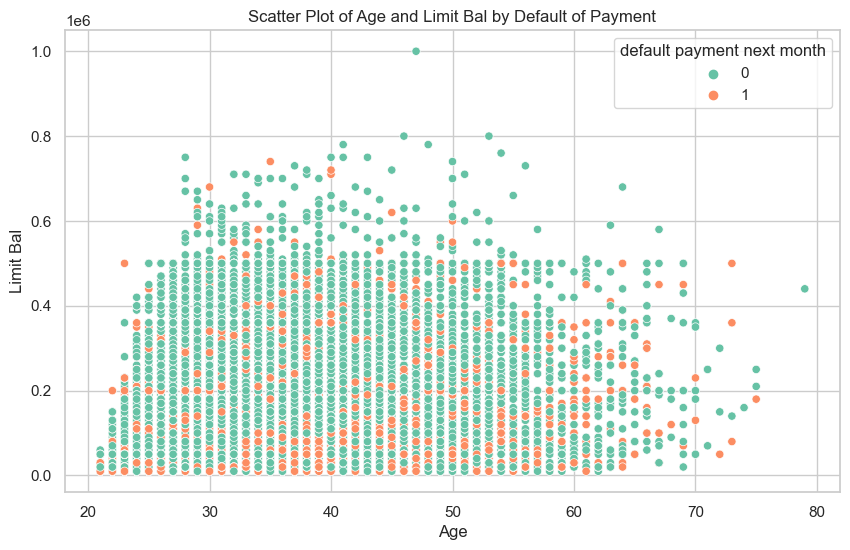

In [24]:

plt.figure(figsize=(10, 6))

sns.set(style="whitegrid")
sns.scatterplot(df['AGE'],df['LIMIT_BAL'], hue=df['default payment next month'], palette="Set2")

plt.xlabel('Age')
plt.ylabel('Limit Bal')
plt.title('Scatter Plot of Age and Limit Bal by Default of Payment')
plt.legend(title='default payment next month' )


plt.show()

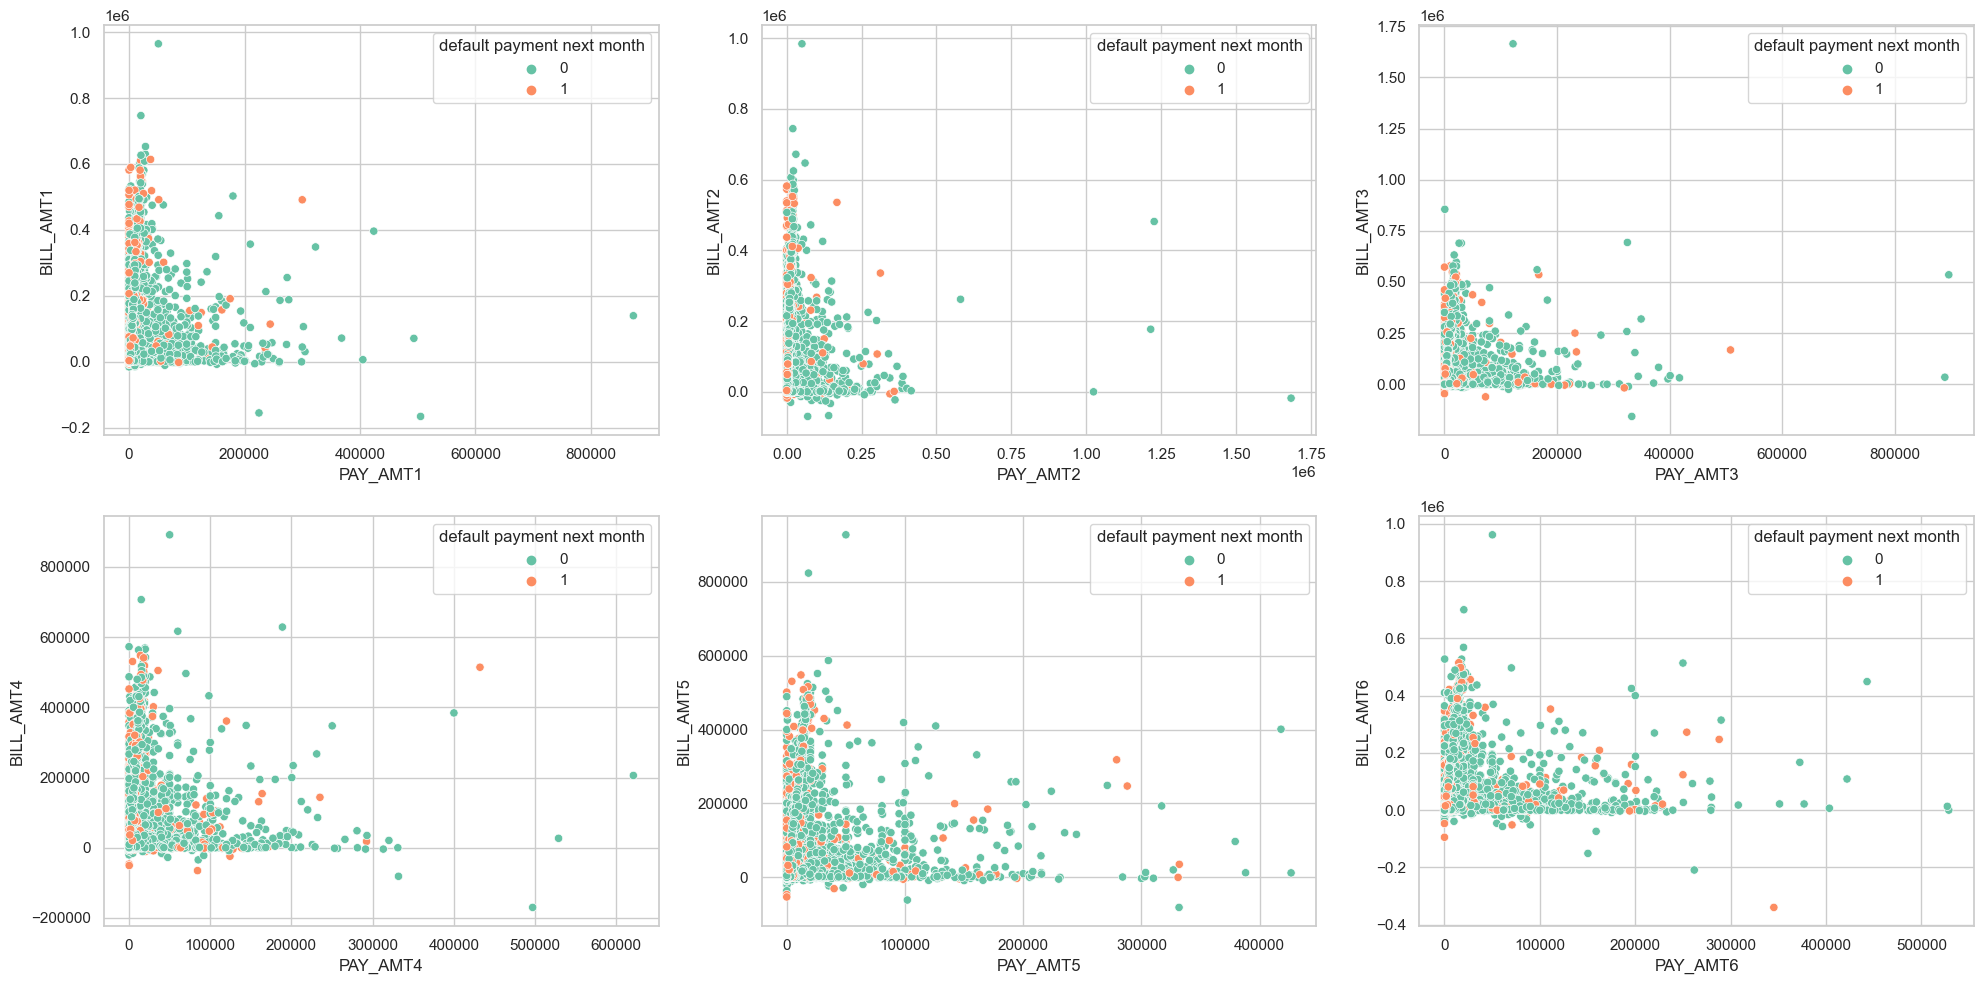

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

plt.subplot(2,3,1)
sns.scatterplot(df['PAY_AMT1'],df['BILL_AMT1'], hue = df['default payment next month'],palette = 'Set2')

plt.subplot(2,3,2)
sns.scatterplot(df['PAY_AMT2'],df['BILL_AMT2'], hue = df['default payment next month'],palette = 'Set2')

plt.subplot(2,3,3)
sns.scatterplot(df['PAY_AMT3'],df['BILL_AMT3'], hue = df['default payment next month'],palette = 'Set2')

plt.subplot(2,3,4)
sns.scatterplot(df['PAY_AMT4'],df['BILL_AMT4'], hue = df['default payment next month'],palette = 'Set2')

plt.subplot(2,3,5)
sns.scatterplot(df['PAY_AMT5'],df['BILL_AMT5'], hue = df['default payment next month'],palette = 'Set2')

plt.subplot(2,3,6)
sns.scatterplot(df['PAY_AMT6'],df['BILL_AMT6'], hue = df['default payment next month'],palette = 'Set2')


plt.tight_layout()
plt.show()

# Correlation

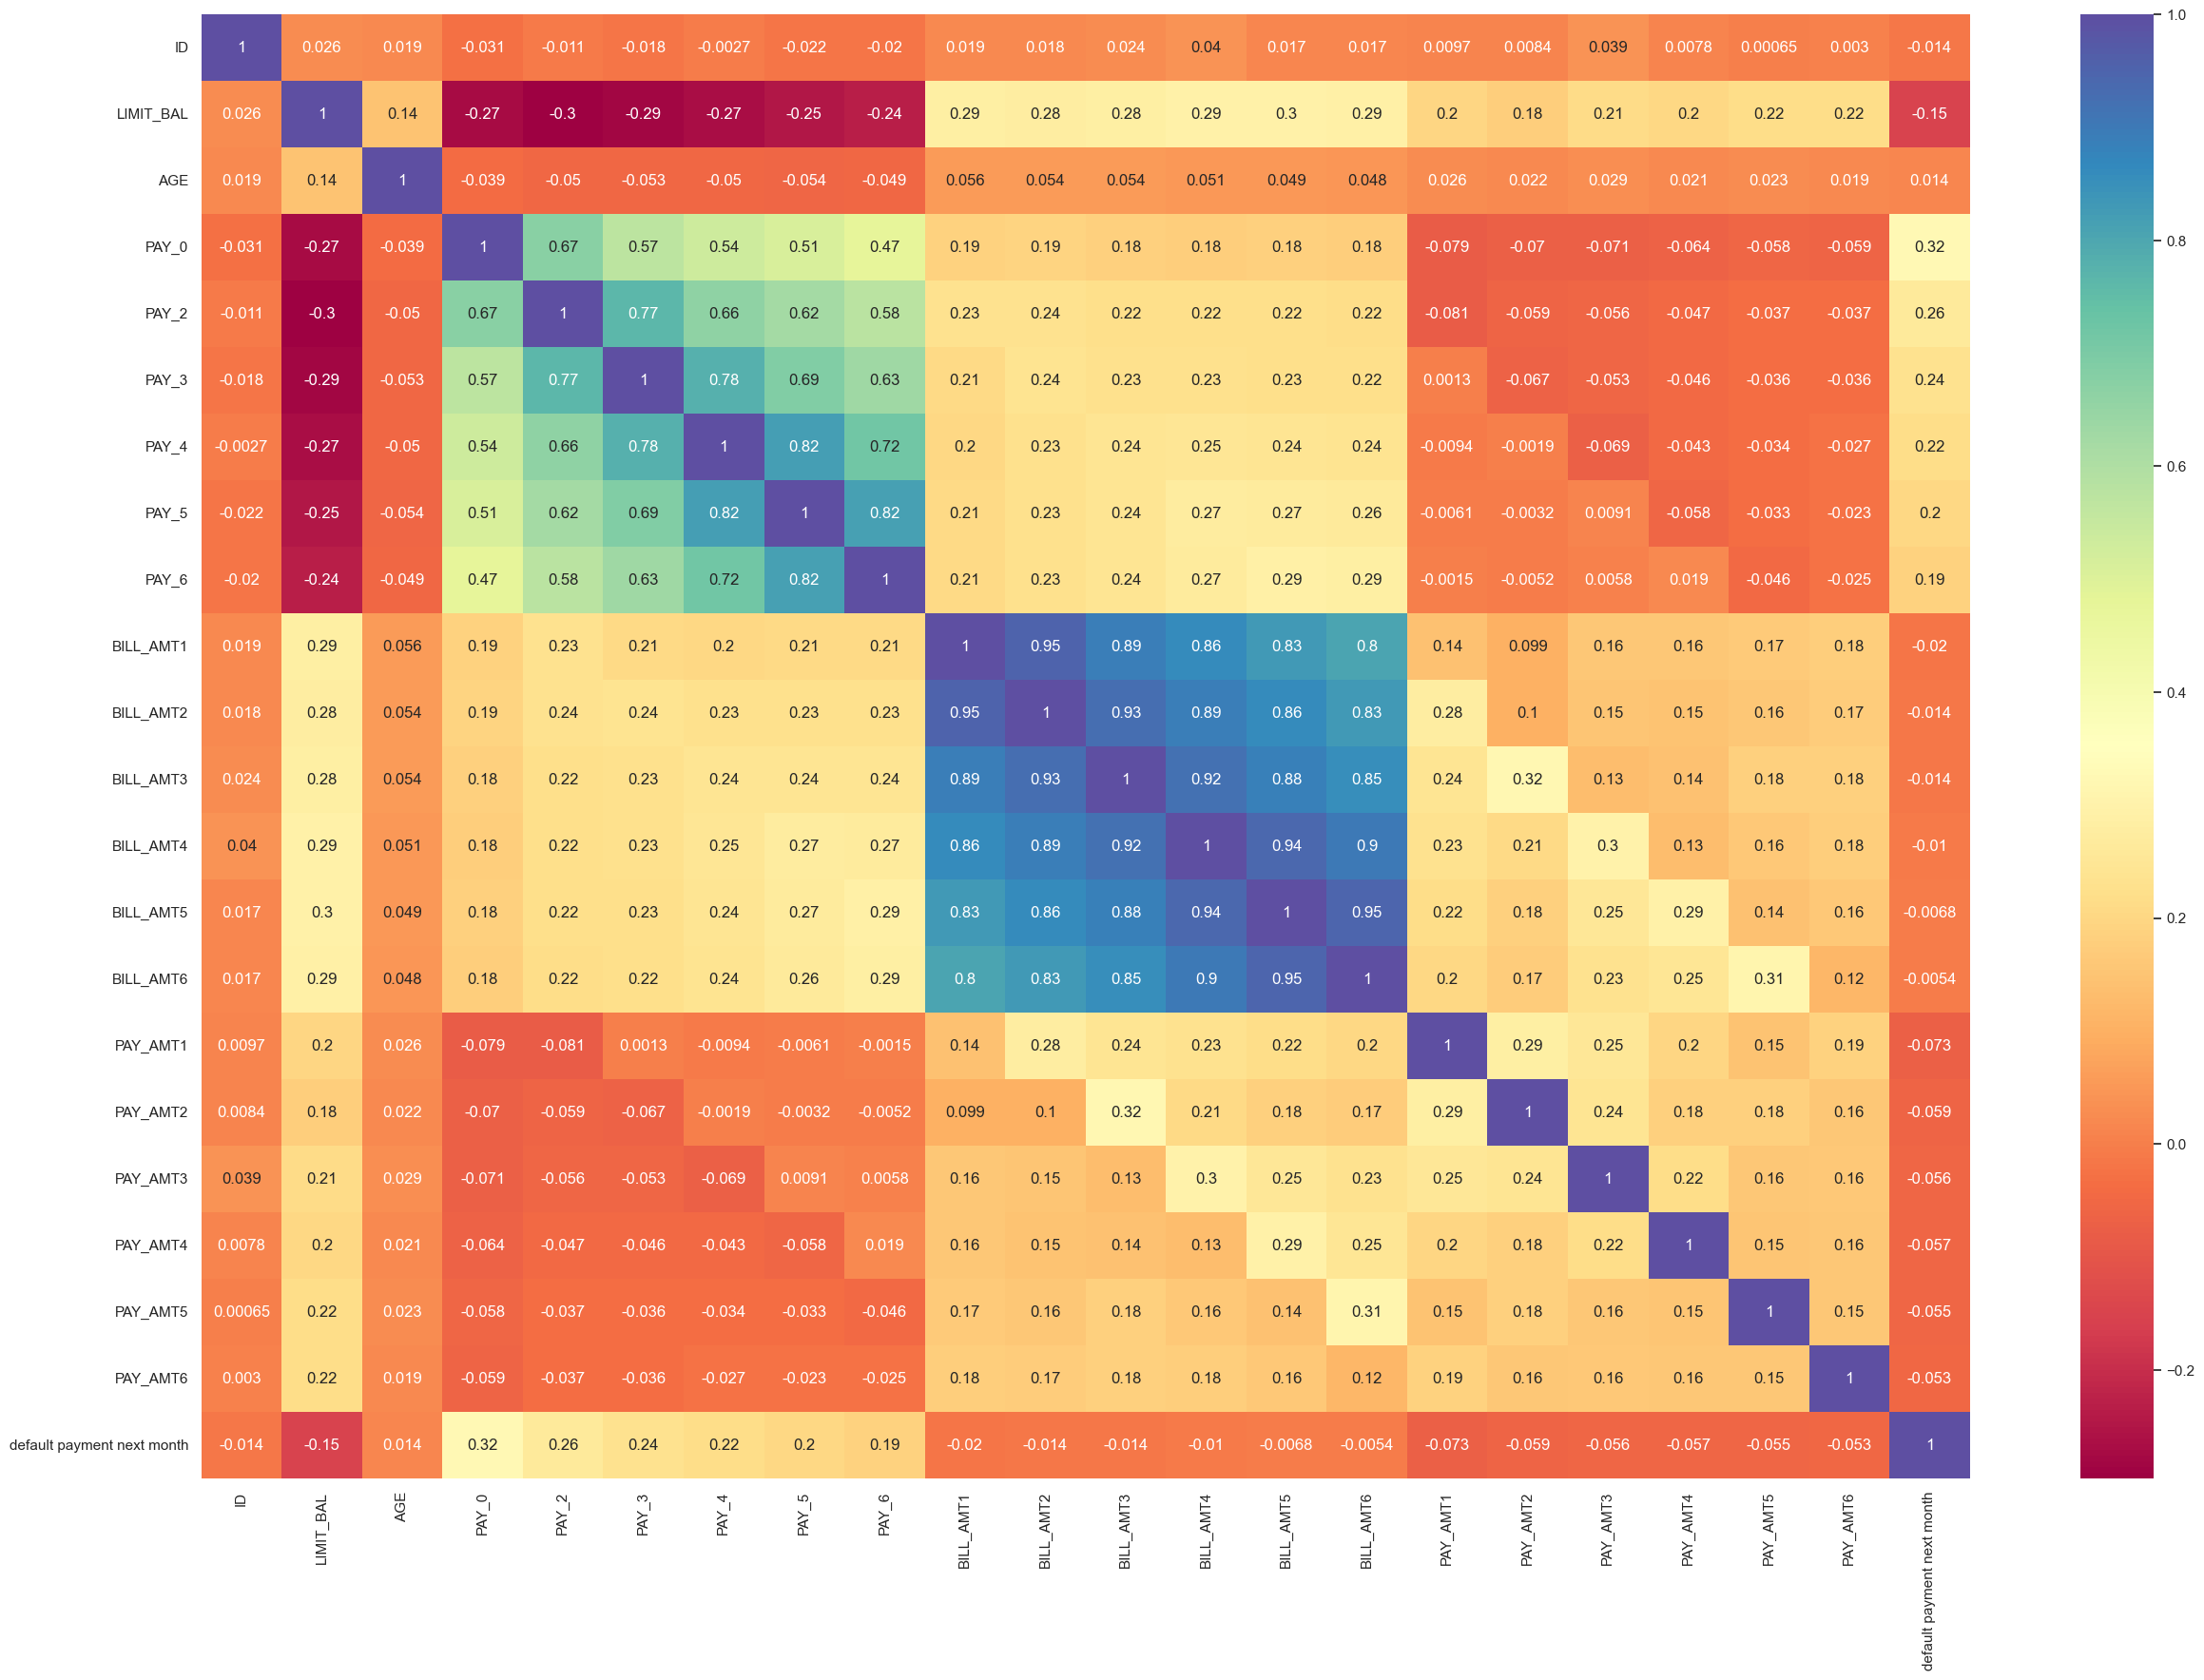

In [26]:
corr = df.corr()

plt.figure(figsize=(30,20))
sns.heatmap(corr, annot = True, cmap = "Spectral")

plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  int64   
 1   LIMIT_BAL                   30000 non-null  int64   
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  category
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  int64   
 7   PAY_2                       30000 non-null  int64   
 8   PAY_3                       30000 non-null  int64   
 9   PAY_4                       30000 non-null  int64   
 10  PAY_5                       30000 non-null  int64   
 11  PAY_6                       30000 non-null  int64   
 12  BILL_AMT1                   30000 non-null  int64   
 13  BILL_AMT2       

# Encoding Categorical Variables

In [28]:
# Converting Repayment status to category as it is an ordinal variable.

In [29]:
df['PAY_0'] = df['PAY_0'].astype('category')
df['PAY_2'] = df['PAY_2'].astype('category')
df['PAY_3'] = df['PAY_3'].astype('category')
df['PAY_4'] = df['PAY_4'].astype('category')
df['PAY_5'] = df['PAY_5'].astype('category')
df['PAY_6'] = df['PAY_6'].astype('category')

In [30]:
df = pd.get_dummies(df,columns = ['SEX','MARRIAGE','EDUCATION',
                                  'PAY_0','PAY_2','PAY_3','PAY_4',
                                  'PAY_5','PAY_6'], drop_first = True)

In [31]:
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,34,29239,14027,13559,14331,14948,15549,1518,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,37,46990,48233,49291,28314,28959,29547,2000,...,0,0,1,0,0,0,0,0,0,0
4,5,50000,57,8617,5670,35835,20940,19146,19131,2000,...,0,0,1,0,0,0,0,0,0,0


# Checking for Outliers

In [32]:
numerical_cols = df[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1','PAY_AMT2',
                     'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]

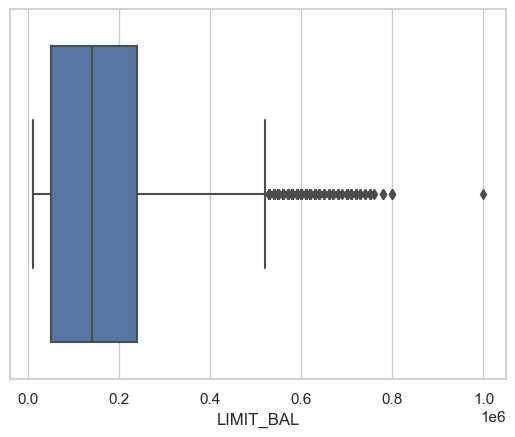

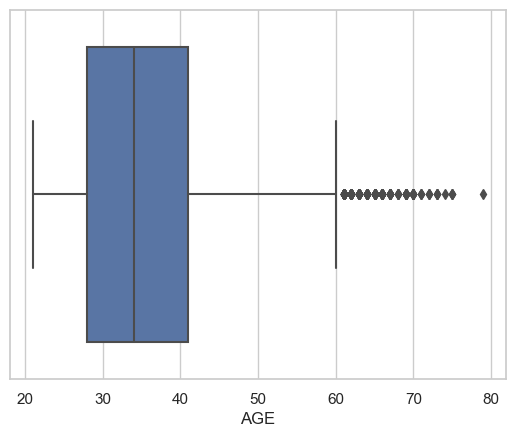

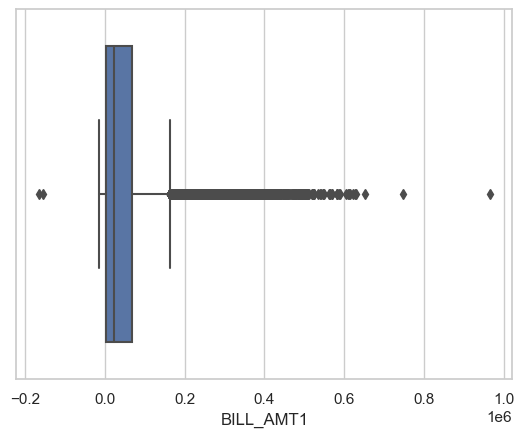

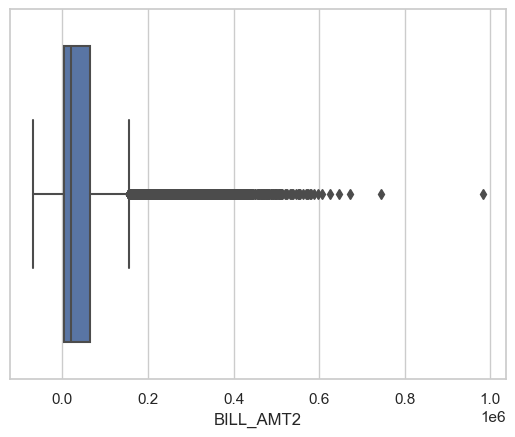

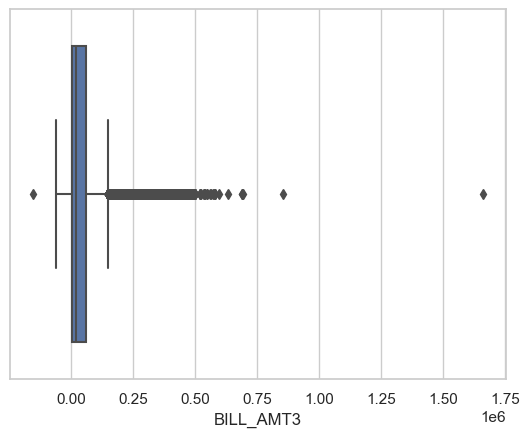

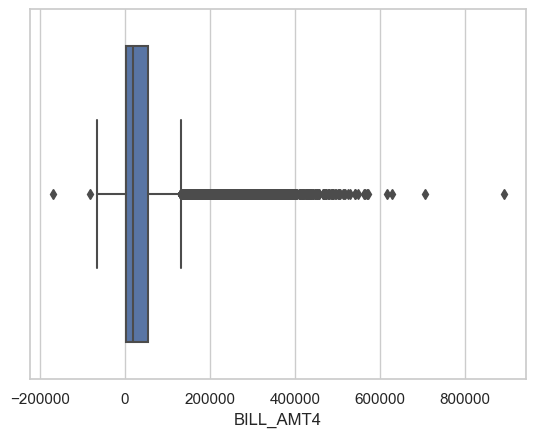

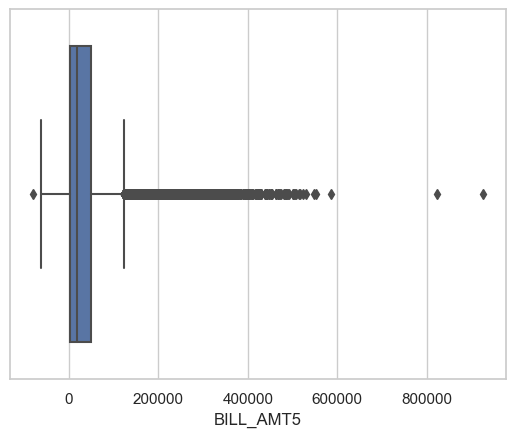

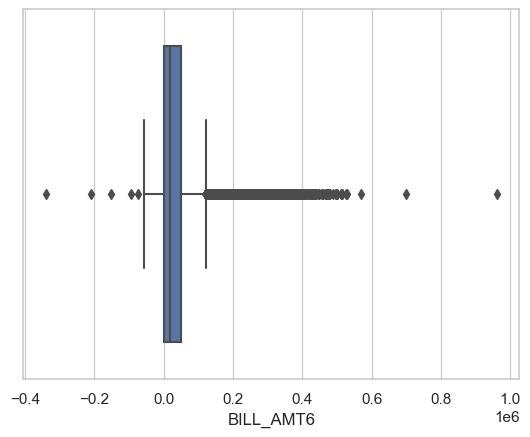

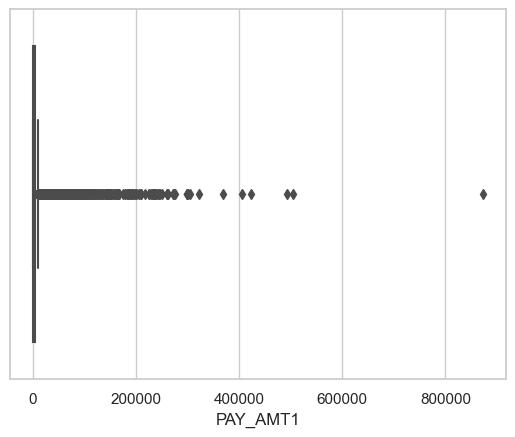

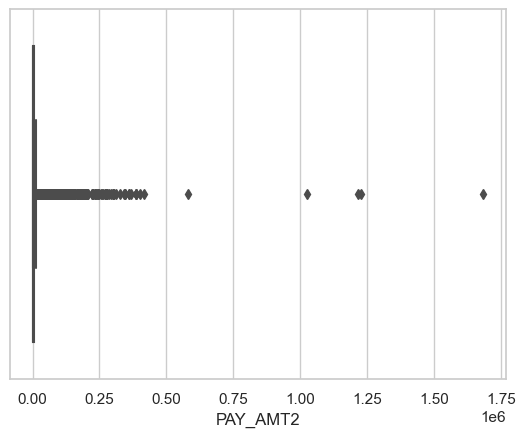

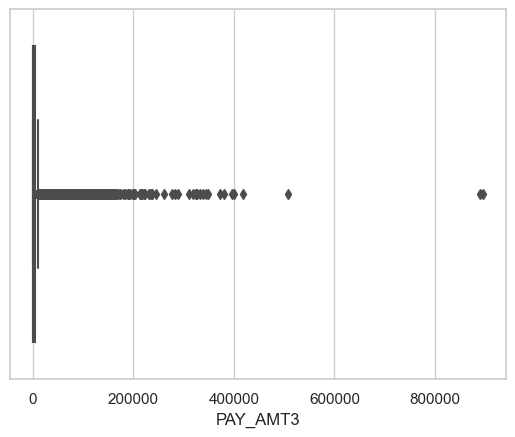

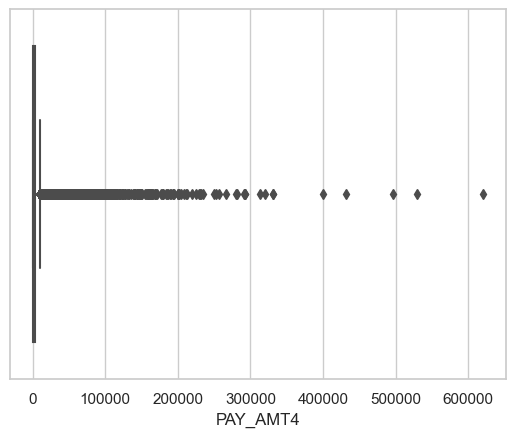

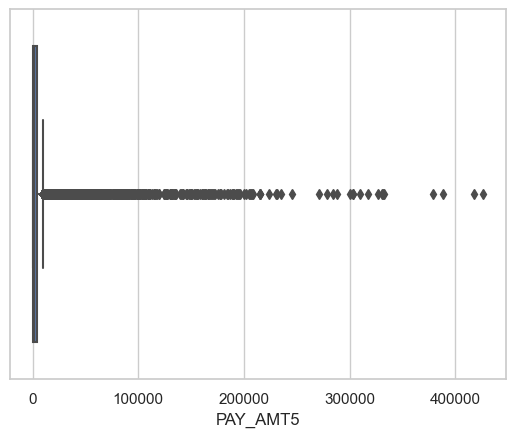

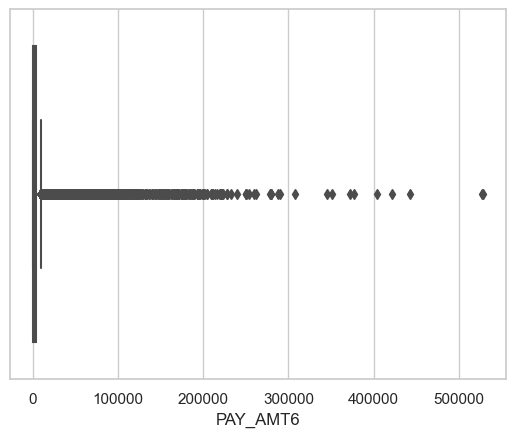

In [33]:
def boxplot(col):
    sns.boxplot(numerical_cols[col])
        
    plt.show()
    
for i in list(numerical_cols.select_dtypes(exclude = 'object').columns):
    boxplot(i)

# Transformation of Numerical Columns

In [34]:
numerical_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
PAY_AMT2,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0


In [35]:
numerical_cols.skew()

LIMIT_BAL     0.992867
AGE           0.732246
BILL_AMT1     2.663861
BILL_AMT2     2.705221
BILL_AMT3     3.087830
BILL_AMT4     2.821965
BILL_AMT5     2.876380
BILL_AMT6     2.846645
PAY_AMT1     14.668364
PAY_AMT2     30.453817
PAY_AMT3     17.216635
PAY_AMT4     12.904985
PAY_AMT5     11.127417
PAY_AMT6     10.640727
dtype: float64

The Standard Deviation for all the numerical columns is high. The data distribution is right skewed.

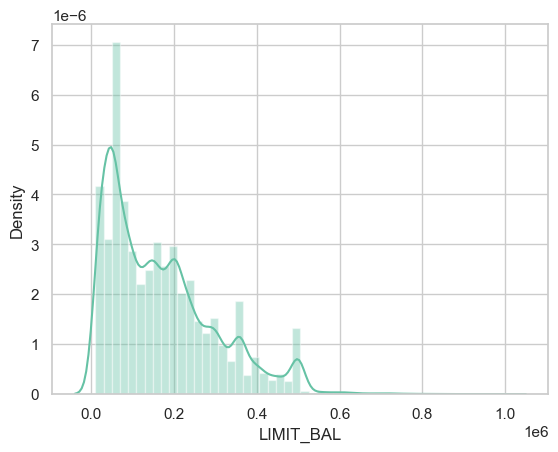

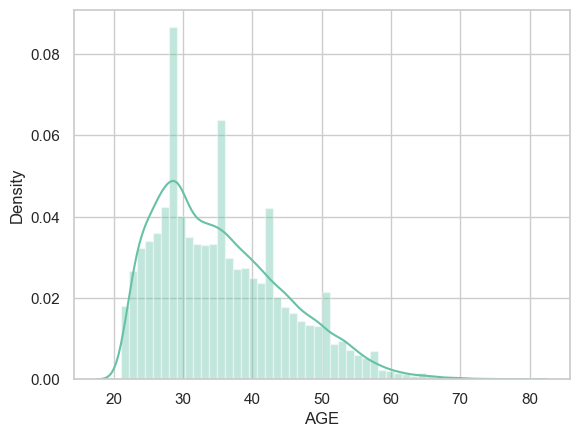

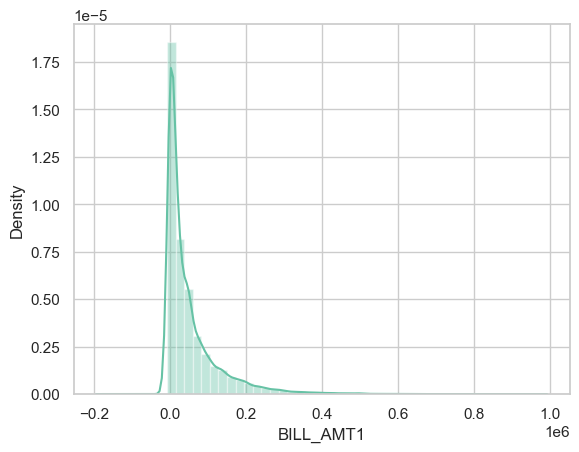

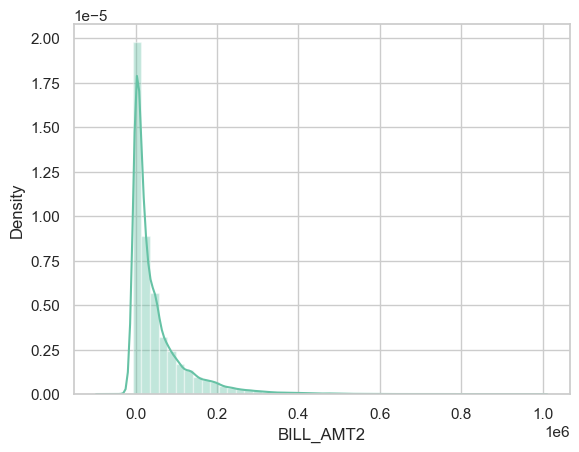

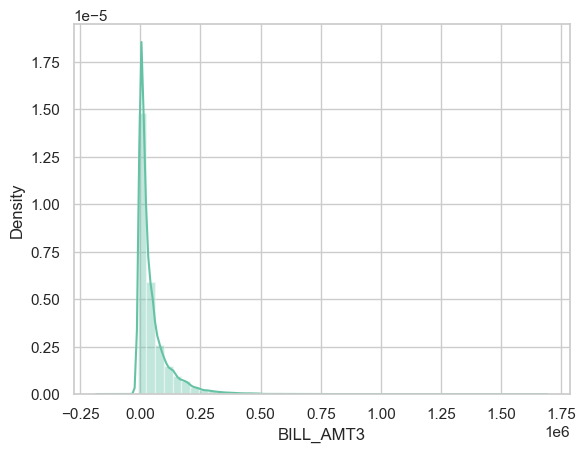

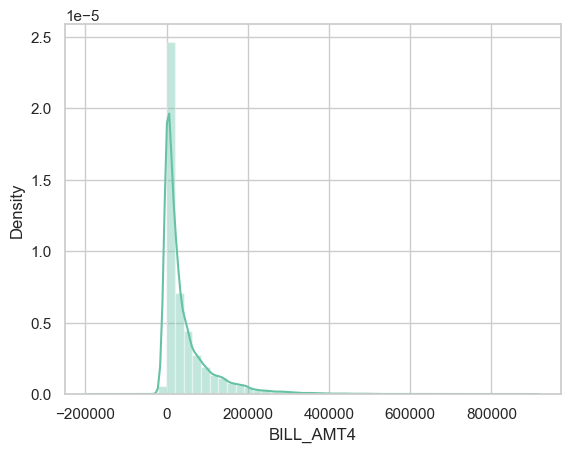

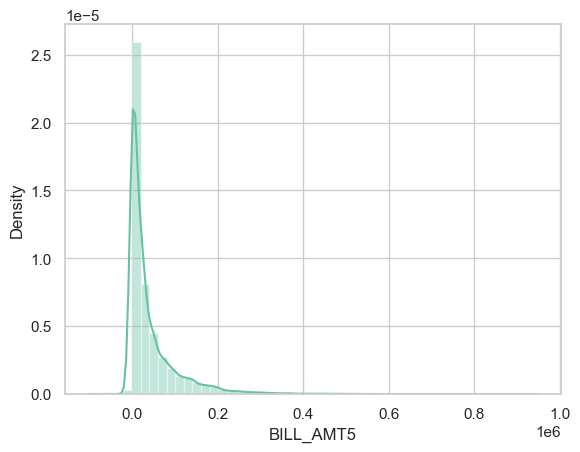

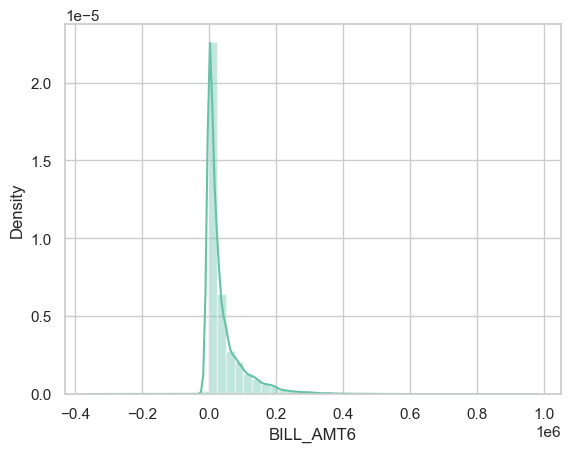

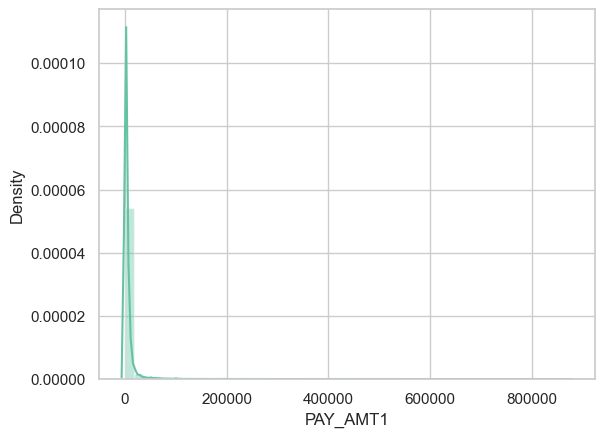

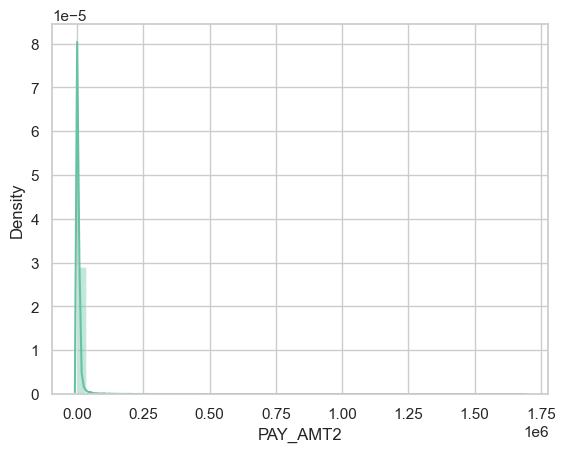

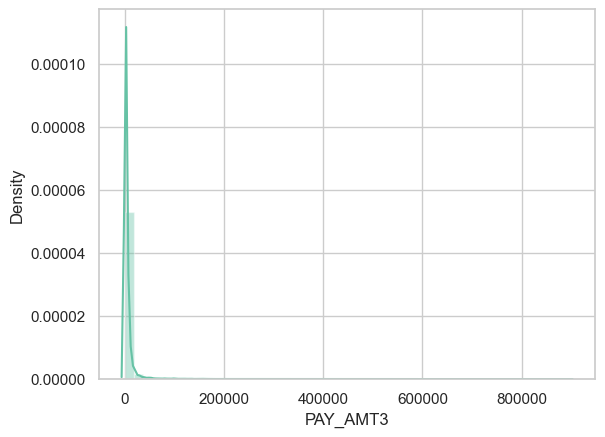

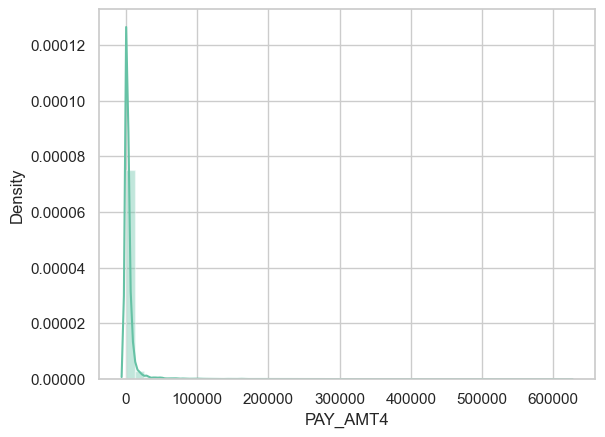

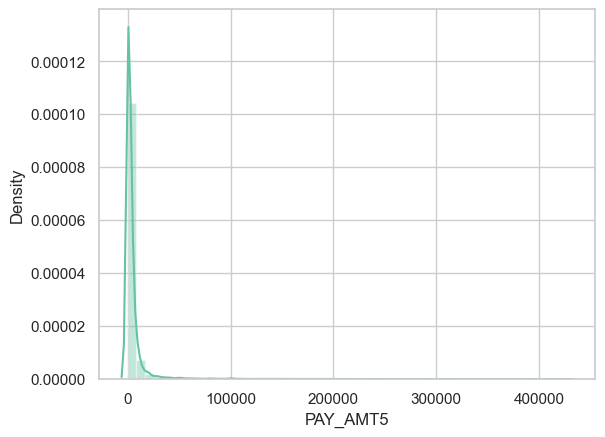

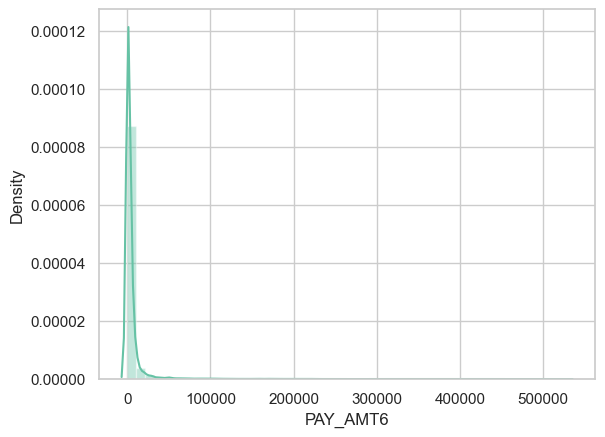

In [36]:
sns.set_palette("Set2")

for col in numerical_cols:
    sns.distplot(numerical_cols[col])
    plt.show()

In [37]:
skewed_cols = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
                  'PAY_AMT5','PAY_AMT6']]

In [38]:
#Applying Yeo-Johnson Power Transformer for the skewed columns

In [39]:
from sklearn.preprocessing import PowerTransformer

In [40]:
yjpt = PowerTransformer(method='yeo-johnson', standardize=True, copy = True)
transformed_cols = yjpt.fit_transform(skewed_cols)
transformed_cols = pd.DataFrame(transformed_cols, columns = skewed_cols.columns)

In [41]:
transformed_cols

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.724472,-0.347889,-1.629996,-1.578070,-1.556978,-1.515825
1,-1.724472,-0.202757,-0.080144,0.009080,-1.556978,0.332020
2,-0.064485,-0.031718,-0.080144,0.009080,0.018806,0.741487
3,0.063555,0.102920,-0.006222,0.046787,0.044891,0.059121
4,0.063555,1.948535,1.066641,1.057406,-0.121440,-0.080835
...,...,...,...,...,...,...
29995,0.875944,1.467718,0.668590,0.491133,0.739442,0.059121
29996,0.023264,0.378656,1.002584,-0.666948,-1.556978,-1.515825
29997,-1.724472,-1.705383,1.587034,0.648057,0.304945,0.520536
29998,2.836778,0.361063,-0.013840,0.281386,2.230110,0.289507


In [42]:
transformed_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_AMT1,30000.0,-5.187207e-16,1.000017,-1.724472,-0.244333,0.087015,0.548896,6.077448
PAY_AMT2,30000.0,2.817214e-17,1.000017,-1.705383,-0.275326,0.100602,0.568036,6.829059
PAY_AMT3,30000.0,5.341358e-15,1.000017,-1.629996,-0.424171,0.167497,0.612684,5.378222
PAY_AMT4,30000.0,-5.229678e-16,1.000017,-1.578070,-0.421542,0.173880,0.625285,4.628937
PAY_AMT5,30000.0,-3.081934e-16,1.000017,-1.556978,-0.457350,0.182035,0.631127,4.155604
PAY_AMT6,30000.0,-3.521139e-16,1.000017,-1.515825,-0.617000,0.215139,0.636287,4.034171


In [43]:
transformed_cols.skew()

PAY_AMT1   -0.133111
PAY_AMT2   -0.112972
PAY_AMT3   -0.151916
PAY_AMT4   -0.165690
PAY_AMT5   -0.178923
PAY_AMT6   -0.175019
dtype: float64

In [44]:
# removing the transfored cols and creating the final df

In [45]:
df1 = df.drop(['PAY_AMT1','PAY_AMT2','PAY_AMT3',
               'PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis = 1)

In [46]:
df1

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default payment next month,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000,24,3913,3102,689,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,26,2682,1725,2682,3272,3455,3261,1,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,34,29239,14027,13559,14331,14948,15549,0,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,37,46990,48233,49291,28314,28959,29547,0,...,0,0,1,0,0,0,0,0,0,0
4,5,50000,57,8617,5670,35835,20940,19146,19131,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,39,188948,192815,208365,88004,31237,15980,0,...,0,0,1,0,0,0,0,0,0,0
29996,29997,150000,43,1683,1828,3502,8979,5190,0,0,...,0,0,1,0,0,0,0,0,0,0
29997,29998,30000,37,3565,3356,2758,20878,20582,19357,1,...,0,0,1,0,0,0,0,0,0,0
29998,29999,80000,41,-1645,78379,76304,52774,11855,48944,1,...,0,1,0,0,0,0,0,0,0,0


In [47]:
df_final = pd.concat([df1,transformed_cols], axis = 1)

In [48]:
df_final

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default payment next month,...,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,24,3913,3102,689,0,0,0,1,...,0,0,0,0,-1.724472,-0.347889,-1.629996,-1.578070,-1.556978,-1.515825
1,2,120000,26,2682,1725,2682,3272,3455,3261,1,...,0,0,0,0,-1.724472,-0.202757,-0.080144,0.009080,-1.556978,0.332020
2,3,90000,34,29239,14027,13559,14331,14948,15549,0,...,0,0,0,0,-0.064485,-0.031718,-0.080144,0.009080,0.018806,0.741487
3,4,50000,37,46990,48233,49291,28314,28959,29547,0,...,0,0,0,0,0.063555,0.102920,-0.006222,0.046787,0.044891,0.059121
4,5,50000,57,8617,5670,35835,20940,19146,19131,0,...,0,0,0,0,0.063555,1.948535,1.066641,1.057406,-0.121440,-0.080835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,39,188948,192815,208365,88004,31237,15980,0,...,0,0,0,0,0.875944,1.467718,0.668590,0.491133,0.739442,0.059121
29996,29997,150000,43,1683,1828,3502,8979,5190,0,0,...,0,0,0,0,0.023264,0.378656,1.002584,-0.666948,-1.556978,-1.515825
29997,29998,30000,37,3565,3356,2758,20878,20582,19357,1,...,0,0,0,0,-1.724472,-1.705383,1.587034,0.648057,0.304945,0.520536
29998,29999,80000,41,-1645,78379,76304,52774,11855,48944,1,...,0,0,0,0,2.836778,0.361063,-0.013840,0.281386,2.230110,0.289507


# Model Buiding

In [49]:
# Split the data

In [50]:
x = df_final.drop(['default payment next month', 'ID', 'age_group'], axis = 1)
y = df_final[['default payment next month']]

In [51]:
x.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,SEX_F,MARRIAGE_Sin,...,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,3913,3102,689,0,0,0,1,0,...,0,0,0,0,-1.724472,-0.347889,-1.629996,-1.578070,-1.556978,-1.515825
1,120000,26,2682,1725,2682,3272,3455,3261,1,1,...,0,0,0,0,-1.724472,-0.202757,-0.080144,0.009080,-1.556978,0.332020
2,90000,34,29239,14027,13559,14331,14948,15549,1,1,...,0,0,0,0,-0.064485,-0.031718,-0.080144,0.009080,0.018806,0.741487
3,50000,37,46990,48233,49291,28314,28959,29547,1,0,...,0,0,0,0,0.063555,0.102920,-0.006222,0.046787,0.044891,0.059121
4,50000,57,8617,5670,35835,20940,19146,19131,0,0,...,0,0,0,0,0.063555,1.948535,1.066641,1.057406,-0.121440,-0.080835


In [52]:
y.head()

,default payment next month
0,1
1,1
2,0
3,0
4,0


In [53]:
y.value_counts()

default payment next month
0                             23364
1                              6636
dtype: int64

In [54]:
# Scaling the data

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)

In [57]:
x_scaled

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,SEX_F,MARRIAGE_Sin,...,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,0.810161,-1.066471,...,-0.020821,-0.025174,-0.039188,-0.008165,-1.724472,-0.347889,-1.629996,-1.578070,-1.556978,-1.515825
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,0.810161,0.937672,...,-0.020821,-0.025174,-0.039188,-0.008165,-1.724472,-0.202757,-0.080144,0.009080,-1.556978,0.332020
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,0.810161,0.937672,...,-0.020821,-0.025174,-0.039188,-0.008165,-0.064485,-0.031718,-0.080144,0.009080,0.018806,0.741487
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,0.810161,-1.066471,...,-0.020821,-0.025174,-0.039188,-0.008165,0.063555,0.102920,-0.006222,0.046787,0.044891,0.059121
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-1.234323,-1.066471,...,-0.020821,-0.025174,-0.039188,-0.008165,0.063555,1.948535,1.066641,1.057406,-0.121440,-0.080835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,-1.234323,-1.066471,...,-0.020821,-0.025174,-0.039188,-0.008165,0.875944,1.467718,0.668590,0.491133,0.739442,0.059121
29996,-0.134759,0.815221,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-1.234323,0.937672,...,-0.020821,-0.025174,-0.039188,-0.008165,0.023264,0.378656,1.002584,-0.666948,-1.556978,-1.515825
29997,-1.059646,0.164303,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-1.234323,0.937672,...,-0.020821,-0.025174,-0.039188,-0.008165,-1.724472,-1.705383,1.587034,0.648057,0.304945,0.520536
29998,-0.674276,0.598248,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,-1.234323,-1.066471,...,-0.020821,-0.025174,-0.039188,-0.008165,2.836778,0.361063,-0.013840,0.281386,2.230110,0.289507


In [58]:
# Splitting the data between Train and Test

In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=101, stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((24000, 78), (6000, 78), (24000, 1), (6000, 1))

In [60]:
# Balancing the imbalanced data

In [61]:
from imblearn.over_sampling import RandomOverSampler

In [62]:
ros = RandomOverSampler()
x_train_ros,y_train_ros = ros.fit_resample(x_train,y_train)

In [63]:
x_train_ros.shape, y_train_ros.shape

((37382, 78), (37382, 1))

In [64]:
y_train_ros.value_counts()

default payment next month
0                             18691
1                             18691
dtype: int64

In [65]:
# Model Buidling

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.model_selection import cross_val_score

# Logistic Regression

In [67]:
lr = LogisticRegression()
lr.fit(x_train_ros,y_train_ros)
y_train_pred_lr = lr.predict(x_train_ros)
y_test_pred_lr = lr.predict(x_test)
lr_train_accuracy = accuracy_score(y_train_ros,y_train_pred_lr)
lr_test_accuracy = accuracy_score(y_test,y_test_pred_lr)
lr_test_report = classification_report(y_test,y_test_pred_lr)
y_pred_proba_train_lr = lr.predict_proba(x_train_ros)
y_pred_proba_test_lr = lr.predict_proba(x_test)
auc_score_train_lr = roc_auc_score(y_train_ros,y_pred_proba_train_lr[:,1])
auc_score_test_lr = roc_auc_score(y_test,y_pred_proba_test_lr[:,1] )

In [68]:
print(lr_train_accuracy)
print(lr_test_accuracy)

0.7112246535765877
0.7671666666666667


In [69]:
print(lr_test_report)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4673
           1       0.48      0.63      0.54      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.72      0.69      6000
weighted avg       0.79      0.77      0.78      6000



In [70]:
print(auc_score_train_lr)
print(auc_score_test_lr)

0.780156615929068
0.7888197054992597


In [ ]:
# Hyper Parameter Tuning LOgistic Regression

In [146]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

In [147]:
param_dist = {
    'C': uniform(0.1, 10.0),  # Inverse of regularization strength (smaller values specify stronger regularization)
    'penalty': ['l1', 'l2'],  # Regularization penalty: 'l1' for L1 regularization, 'l2' for L2 regularization
    'solver': ['liblinear', 'saga'] # Optimization algorithm for the logistic regression
}

In [148]:
random_search = RandomizedSearchCV(
    lr,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings to sample
    scoring='roc_auc',  # Use an appropriate scoring metric
    n_jobs=-1,  # Use all available CPU cores
    cv=5  # Number of cross-validation folds
)

In [149]:
random_search.fit(x_train_ros, y_train_ros)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000027640C33DF0>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   scoring='roc_auc')

In [150]:
print("Best Parameters: ", random_search.best_params_)
print("Best ROC-AUC Score: ", random_search.best_score_)


Best Parameters:  {'C': 5.4175981061389376, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC-AUC Score:  0.7783722692865734


In [151]:
lr = LogisticRegression(C =  5.4175981061389376, penalty = 'l2', solver = 'liblinear')
lr.fit(x_train_ros,y_train_ros)
y_train_pred_lr = lr.predict(x_train_ros)
y_test_pred_lr = lr.predict(x_test)
lr_train_accuracy = accuracy_score(y_train_ros,y_train_pred_lr)
lr_test_accuracy = accuracy_score(y_test,y_test_pred_lr)
lr_test_report = classification_report(y_test,y_test_pred_lr)
y_pred_proba_train_lr = lr.predict_proba(x_train_ros)
y_pred_proba_test_lr = lr.predict_proba(x_test)
auc_score_train_lr = roc_auc_score(y_train_ros,y_pred_proba_train_lr[:,1])
auc_score_test_lr = roc_auc_score(y_test,y_pred_proba_test_lr[:,1] )

In [152]:
print(lr_train_accuracy)
print(lr_test_accuracy)

0.7111979027339361
0.7668333333333334


In [153]:
print(lr_test_report)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4673
           1       0.48      0.63      0.54      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.72      0.69      6000
weighted avg       0.79      0.77      0.78      6000



In [154]:
print(auc_score_train_lr)
print(auc_score_test_lr)

0.7801550759415503
0.7888129324756965


# Random Forest Model

In [155]:
rf = RandomForestClassifier()
rf.fit(x_train_ros,y_train_ros)
y_train_pred_rf = rf.predict(x_train_ros)
y_test_pred_rf = rf.predict(x_test)
rf_train_accuracy = accuracy_score(y_train_ros,y_train_pred_rf)
rf_test_accuracy = accuracy_score(y_test,y_test_pred_rf)
rf_test_report = classification_report(y_test,y_test_pred_rf)
y_pred_proba_train_rf = rf.predict_proba(x_train_ros)
y_pred_proba_test_rf = rf.predict_proba(x_test)
auc_score_train_rf = roc_auc_score(y_train_ros,y_pred_proba_train_rf[:,1])
auc_score_test_rf = roc_auc_score(y_test,y_pred_proba_test_rf[:,1] )

In [156]:
print(rf_train_accuracy)
print(rf_test_accuracy)

0.9995452356749238
0.817


In [157]:
print(rf_test_report)

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4673
           1       0.62      0.44      0.52      1327

    accuracy                           0.82      6000
   macro avg       0.74      0.68      0.70      6000
weighted avg       0.80      0.82      0.80      6000



In [158]:
print(auc_score_train_rf)
print(auc_score_test_rf)

0.9999893703649686
0.775944107074407


In [ ]:
# Hyper Parameter Tuning RF model

In [159]:
from scipy.stats import randint

In [160]:
param_dist = {'n_estimators': randint(10,200),
             'max_depth' : randint(1,20),
              'min_samples_split': randint(2,20),
               'min_samples_leaf' : randint(1,20),
              'max_features' : ['auto','sqrt','log2'],
              'bootstrap' :[True, False],
              'oob_score' : [True,False]         
              }

In [161]:
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings to sample
    scoring='roc_auc',  # Use an appropriate scoring metric
    n_jobs=-1,  # Use all available CPU cores
    cv=5  # Number of cross-validation folds
)

In [162]:
random_search.fit(x_train_ros, y_train_ros)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027638E32A30>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027621C3AEB0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027621B95E20>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027621B95F10>,
                                        'oob_score': [True, False]},
                   scoring='roc_auc')

In [163]:
print("Best Parameters: ", random_search.best_params_)
print("Best ROC-AUC Score: ", random_search.best_score_)

Best Parameters:  {'bootstrap': True, 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 36, 'oob_score': True}
Best ROC-AUC Score:  0.936516253468022


In [165]:
rf = RandomForestClassifier(bootstrap= True, max_depth= 18, max_features= 'auto', min_samples_leaf= 2, 
                            min_samples_split= 4, n_estimators= 36, oob_score= True)
rf.fit(x_train_ros,y_train_ros)
y_train_pred_rf = rf.predict(x_train_ros)
y_test_pred_rf = rf.predict(x_test)
rf_train_accuracy = accuracy_score(y_train_ros,y_train_pred_rf)
rf_test_accuracy = accuracy_score(y_test,y_test_pred_rf)
rf_test_report = classification_report(y_test,y_test_pred_rf)
y_pred_proba_train_rf = rf.predict_proba(x_train_ros)
y_pred_proba_test_rf = rf.predict_proba(x_test)
auc_score_train_rf = roc_auc_score(y_train_ros,y_pred_proba_train_rf[:,1])
auc_score_test_rf = roc_auc_score(y_test,y_pred_proba_test_rf[:,1] )

In [166]:
print(rf_train_accuracy)
print(rf_test_accuracy)

0.9290300144454551
0.8043333333333333


In [167]:
print(rf_test_report)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4673
           1       0.56      0.52      0.54      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.70      0.71      6000
weighted avg       0.80      0.80      0.80      6000



In [168]:
print(auc_score_train_rf)
print(auc_score_test_rf)

0.9836499897363268
0.7795688035179729


# XGBoost

In [169]:
xgbc = xgb.XGBClassifier()
xgbc.fit(x_train_ros,y_train_ros)
y_train_pred_xgb = xgbc.predict(x_train_ros)
y_test_pred_xgb = xgbc.predict(x_test)
xgb_train_accuracy = accuracy_score(y_train_ros,y_train_pred_xgb)
xgb_test_accuracy = accuracy_score(y_test,y_test_pred_xgb)
xgb_test_report = classification_report(y_test,y_test_pred_xgb)
y_pred_proba_train_xgb = xgbc.predict_proba(x_train_ros)
y_pred_proba_test_xgb = xgbc.predict_proba(x_test)
auc_score_train_xgb = roc_auc_score(y_train_ros,y_pred_proba_train_xgb[:,1])
auc_score_test_xgb = roc_auc_score(y_test,y_pred_proba_test_xgb[:,1] )

In [170]:
print(xgb_train_accuracy)
print(xgb_test_accuracy)

0.8754213257717618
0.7723333333333333


In [171]:
print(xgb_test_report)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4673
           1       0.49      0.57      0.53      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.77      0.78      6000



In [172]:
print(auc_score_train_xgb)
print(auc_score_test_xgb)

0.9485956216935477
0.766897040849879


In [173]:
# Hyper Parameter Tuning XGB model

In [174]:
from sklearn.metrics import make_scorer, roc_auc_score

In [175]:
param_dist = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': randint(10,200),
    'max_depth': randint(1,20),
    }

In [176]:
scoring = make_scorer(roc_auc_score, greater_is_better=True)
random_search = RandomizedSearchCV(
    xgbc, param_distributions=param_dist, n_iter=10, scoring=scoring, cv=5, n_jobs=-1)

In [177]:
random_search.fit(x_train_ros, y_train_ros)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                            

In [178]:
print("Best Hyperparameters: ", random_search.best_params_)
print("Best ROC AUC Score: ", random_search.best_score_)

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 89}
Best ROC AUC Score:  0.921888139577181


In [179]:
xgbc = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 15, n_estimators = 89)
xgbc.fit(x_train_ros,y_train_ros)
y_train_pred_xgb = xgbc.predict(x_train_ros)
y_test_pred_xgb = xgbc.predict(x_test)
xgb_train_accuracy = accuracy_score(y_train_ros,y_train_pred_xgb)
xgb_test_accuracy = accuracy_score(y_test,y_test_pred_xgb)
xgb_test_report = classification_report(y_test,y_test_pred_xgb)
y_pred_proba_train_xgb = xgbc.predict_proba(x_train_ros)
y_pred_proba_test_xgb = xgbc.predict_proba(x_test)
auc_score_train_xgb = roc_auc_score(y_train_ros,y_pred_proba_train_xgb[:,1])
auc_score_test_xgb = roc_auc_score(y_test,y_pred_proba_test_xgb[:,1] )

In [180]:
print(xgb_train_accuracy)
print(xgb_test_accuracy)

0.9884168851318816
0.8051666666666667


In [181]:
print(xgb_test_report)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4673
           1       0.57      0.47      0.52      1327

    accuracy                           0.81      6000
   macro avg       0.71      0.69      0.70      6000
weighted avg       0.79      0.81      0.80      6000



In [182]:
print(auc_score_train_xgb)
print(auc_score_test_xgb)

0.9992883883701735
0.7636882403055859


# AdaBoost

In [183]:
adb = AdaBoostClassifier()
adb.fit(x_train_ros,y_train_ros)
y_train_pred_adb = adb.predict(x_train_ros)
y_test_pred_adb = adb.predict(x_test)
adb_train_accuracy = accuracy_score(y_train_ros,y_train_pred_adb)
adb_test_accuracy = accuracy_score(y_test,y_test_pred_adb)
adb_test_report = classification_report(y_test,y_test_pred_adb)
y_pred_proba_train_adb = adb.predict_proba(x_train_ros)
y_pred_proba_test_adb = adb.predict_proba(x_test)
auc_score_train_adb = roc_auc_score(y_train_ros,y_pred_proba_train_adb[:,1])
auc_score_test_adb = roc_auc_score(y_test,y_pred_proba_test_adb[:,1] )

In [184]:
print(adb_train_accuracy)
print(adb_test_accuracy)

0.7137659836284843
0.762


In [185]:
print(adb_test_report)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.47      0.62      0.54      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000



In [186]:
print(auc_score_train_adb)
print(auc_score_test_adb)

0.7855705722880718
0.780972996438841


In [ ]:
# HyperParameter Tuning AdaBoost model

In [187]:
param_dist = {
    'n_estimators': randint(50, 200),  # Number of weak learners
    'learning_rate': np.logspace(-4, 0, 100),  # Learning rate
}

In [188]:
random_search = RandomizedSearchCV(adb, param_distributions=param_dist,scoring = 'roc_auc', n_iter=20, cv=5, n_jobs=-1)
random_search.fit(x_train_ros, y_train_ros)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.0370...
       2.47707636e-01, 2.71858824e-01, 2.98364724e-01, 3.27454916e-01,
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002761FF38670>},
                   scoring='roc_auc')

In [189]:
print("Best Hyperparameters:", random_search.best_params_)
print("Best ROC AUC Score: ", random_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.3593813663804629, 'n_estimators': 187}
Best ROC AUC Score:  0.7861014957671182


In [191]:
adb = AdaBoostClassifier(learning_rate = 0.3593813663804629, n_estimators = 187)
adb.fit(x_train_ros,y_train_ros)
y_train_pred_adb = adb.predict(x_train_ros)
y_test_pred_adb = adb.predict(x_test)
adb_train_accuracy = accuracy_score(y_train_ros,y_train_pred_adb)
adb_test_accuracy = accuracy_score(y_test,y_test_pred_adb)
adb_test_report = classification_report(y_test,y_test_pred_adb)
y_pred_proba_train_adb = adb.predict_proba(x_train_ros)
y_pred_proba_test_adb = adb.predict_proba(x_test)
auc_score_train_adb = roc_auc_score(y_train_ros,y_pred_proba_train_adb[:,1])
auc_score_test_adb = roc_auc_score(y_test,y_pred_proba_test_adb[:,1] )

In [192]:
print(adb_train_accuracy)
print(adb_test_accuracy)

0.7186078861484136
0.7681666666666667


In [193]:
print(adb_test_report)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4673
           1       0.48      0.62      0.54      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.72      0.69      6000
weighted avg       0.79      0.77      0.78      6000



In [194]:
print(auc_score_train_adb)
print(auc_score_test_adb)

0.7909722545458192
0.784475375302105


# Comparing the accuracies of all the models

In [195]:
model_names = ['Logistic_Reg', 'Random_Forest', 'XGBoost', 'ADABoost']
train_accuracies = [lr_train_accuracy, rf_train_accuracy, xgb_train_accuracy,adb_train_accuracy]  
test_accuracies = [lr_test_accuracy, rf_test_accuracy, xgb_test_accuracy,adb_test_accuracy]  

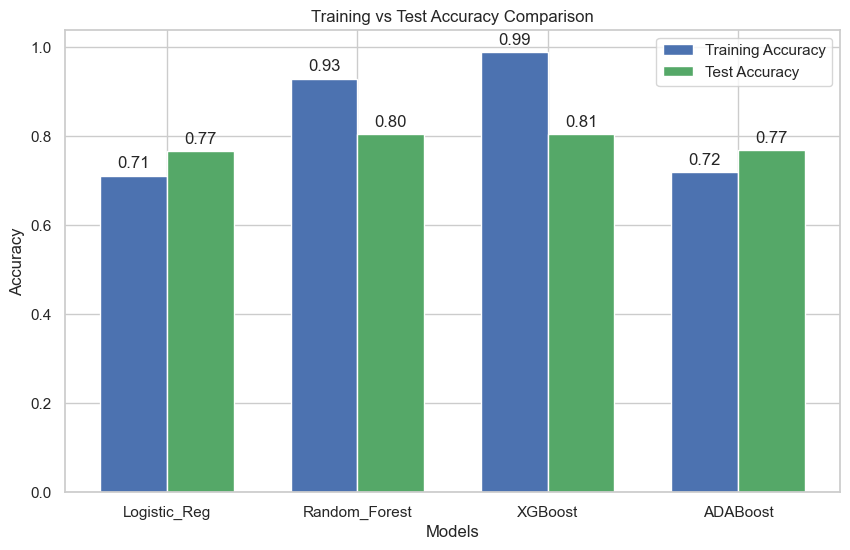

In [196]:
width = 0.35
x = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(10, 6))
train_bars = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='b')
test_bars = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='g')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Training vs Test Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Add accuracy values on top of the bars
for i in range(len(model_names)):
    ax.text(x[i] - width/2, train_accuracies[i] + 0.01, f'{train_accuracies[i]:.2f}', ha='center', va='bottom')
    ax.text(x[i] + width/2, test_accuracies[i] + 0.01, f'{test_accuracies[i]:.2f}', ha='center', va='bottom')

plt.show()

In [197]:
# Plotting roc_auc curves of all the models

In [198]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_test_lr[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_test_rf[:,1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_test_xgb[:,1])
fpr_adb, tpr_adb, _ = roc_curve(y_test, y_pred_proba_test_adb[:,1])

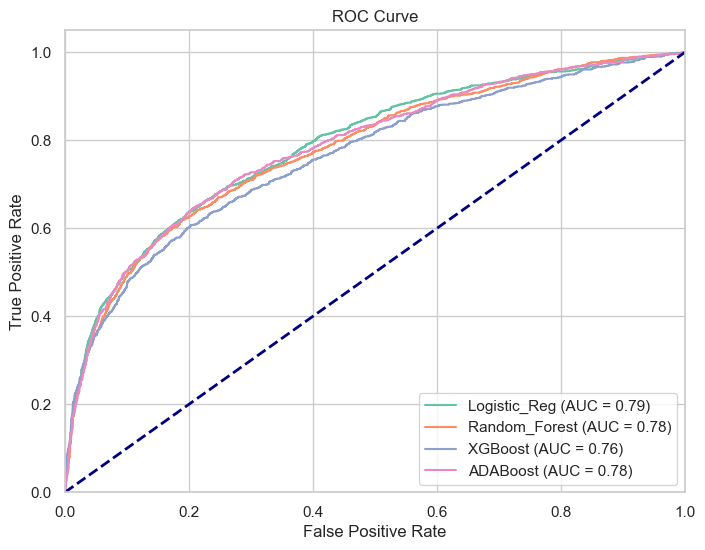

In [199]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic_Reg (AUC = {auc_score_test_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random_Forest (AUC = {auc_score_test_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_score_test_xgb:.2f})')
plt.plot(fpr_adb, tpr_adb, label=f'ADABoost (AUC = {auc_score_test_adb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

The ROC-AUC score of Logistic Regression and ADABoost is better than the other models.

In [ ]:
The ROC-AUC score of all the models are almost similar, Logistic Regression giving the highest number.

In [209]:
print(lr_test_report)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4673
           1       0.48      0.63      0.54      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.72      0.69      6000
weighted avg       0.79      0.77      0.78      6000



In [210]:
print(rf_test_report)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4673
           1       0.56      0.52      0.54      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.70      0.71      6000
weighted avg       0.80      0.80      0.80      6000



In [211]:
print(xgb_test_report)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4673
           1       0.57      0.47      0.52      1327

    accuracy                           0.81      6000
   macro avg       0.71      0.69      0.70      6000
weighted avg       0.79      0.81      0.80      6000



In [212]:
print(adb_test_report)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4673
           1       0.48      0.62      0.54      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.72      0.69      6000
weighted avg       0.79      0.77      0.78      6000

